In [1]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('https://drive.google.com/uc?id=1kk6sMP1SMnGVXYG0wnInMUK_n69aJqbV')

In [3]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,NaN,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,NaN,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,NaN,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,NaN,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,NaN,Melbourne Cricket Ground


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63888 entries, 0 to 63887
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        63888 non-null  int64  
 1   match_id          63888 non-null  int64  
 2   batting_team      63888 non-null  object 
 3   bowling_team      63888 non-null  object 
 4   ball              63888 non-null  float64
 5   runs              63888 non-null  int64  
 6   player_dismissed  63888 non-null  object 
 7   city              55340 non-null  object 
 8   venue             63888 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 4.4+ MB


In [5]:
df.columns

Index(['Unnamed: 0', 'match_id', 'batting_team', 'bowling_team', 'ball',
       'runs', 'player_dismissed', 'city', 'venue'],
      dtype='object')

In [6]:
df.isnull().sum()

Unnamed: 0             0
match_id               0
batting_team           0
bowling_team           0
ball                   0
runs                   0
player_dismissed       0
city                8548
venue                  0
dtype: int64

In [7]:
df.shape

(63888, 9)

## Data Preprocessing

In [8]:
df[df['city'].isnull()]['venue'].value_counts()

Dubai International Cricket Stadium        2969
Pallekele International Cricket Stadium    2066
Melbourne Cricket Ground                   1453
Sydney Cricket Ground                       749
Adelaide Oval                               498
Harare Sports Club                          372
Sharjah Cricket Stadium                     249
Sylhet International Cricket Stadium        128
Carrara Oval                                 64
Name: venue, dtype: int64

### filling city null values with help of venue feature

In [9]:
cities = np.where(df['city'].isnull(), df['venue'].str.split().apply(lambda x: x[0]), df['city'])

In [10]:
df['city'] = cities

In [11]:
df.isnull().sum()

Unnamed: 0          0
match_id            0
batting_team        0
bowling_team        0
ball                0
runs                0
player_dismissed    0
city                0
venue               0
dtype: int64

In [12]:
df['city'].value_counts()

Colombo          4086
Mirpur           3420
Johannesburg     3331
Dubai            2969
Auckland         2532
                 ... 
Victoria          123
Potchefstroom     122
Dharamsala        122
Ahmedabad         121
Carrara            64
Name: city, Length: 86, dtype: int64

### We will ignore the city where less than 600 ball delivery occured

In [13]:
eligible_cities = df['city'].value_counts()[df['city'].value_counts() > 600].index.tolist()

In [14]:
eligible_cities

['Colombo',
 'Mirpur',
 'Johannesburg',
 'Dubai',
 'Auckland',
 'Cape Town',
 'London',
 'Pallekele',
 'Barbados',
 'Sydney',
 'Melbourne',
 'Durban',
 'St Lucia',
 'Wellington',
 'Lauderhill',
 'Hamilton',
 'Centurion',
 'Manchester',
 'Abu Dhabi',
 'Mumbai',
 'Nottingham',
 'Southampton',
 'Mount Maunganui',
 'Chittagong',
 'Kolkata',
 'Lahore',
 'Delhi',
 'Nagpur',
 'Chandigarh',
 'Adelaide',
 'Bangalore',
 'St Kitts',
 'Cardiff',
 'Christchurch',
 'Trinidad']

In [15]:
df = df[df['city'].isin(eligible_cities)]

In [16]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground
...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium


## adding new features: `current score` by taking comulative sum of runs feature by grouping with match id

In [17]:
df['current_score'] = df.groupby('match_id').cumsum()['runs']

In [18]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3
...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127


## adding new features: `over` and `ball_no` by manipulating the ball features

In [19]:
df['over'] = df['ball'].apply(lambda x: str(x).split(".")[0])
df['ball_no'] = df['ball'].apply(lambda x: str(x).split(".")[1])

In [20]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6


In [21]:
df['match_id'].value_counts()

691    134
789    133
98     133
589    132
520    132
      ... 
673     55
746     44
819     29
433     16
700      2
Name: match_id, Length: 416, dtype: int64

## adding new features: `balls bowled` is created by the help of over and ball no features

In [22]:
df['balls_bowled'] = (df['over'].astype('int')*6 + df['ball_no'].astype('int'))

In [23]:
df

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63883,121,964,Sri Lanka,Australia,19.3,1,0,Colombo,R Premadasa Stadium,125,19,3,117
63884,122,964,Sri Lanka,Australia,19.4,0,0,Colombo,R Premadasa Stadium,125,19,4,118
63885,123,964,Sri Lanka,Australia,19.5,0,DM de Silva,Colombo,R Premadasa Stadium,125,19,5,119
63886,124,964,Sri Lanka,Australia,19.6,2,0,Colombo,R Premadasa Stadium,127,19,6,120


## adding new features: `balls_left` creating by the help of balls_bowled

In [24]:
df['balls_left'] = 120 - df['balls_bowled']

In [25]:
df['balls_left'] = df['balls_left'].apply(lambda x: 0 if x < 0 else x)

In [26]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115


## modifying feature: `player_dismissed` was categorical, so we made it numerical

In [27]:
df['player_dismissed'] = df['player_dismissed'].apply(lambda x: 1 if x!= '0' else 0)

In [28]:
df.sample(5)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left
23669,108,464,England,Australia,17.4,0,1,Cape Town,Newlands,128,17,4,106,14
57829,107,868,England,Pakistan,17.1,1,0,Dubai,Dubai International Cricket Stadium,140,17,1,103,17
5778,38,78,England,India,6.3,1,0,Manchester,Old Trafford,56,6,3,39,81
16314,2,238,New Zealand,England,0.3,1,0,Christchurch,Hagley Oval,1,0,3,3,117
11126,84,143,Bangladesh,West Indies,13.6,0,0,Lauderhill,Central Broward Regional Park Stadium Turf Ground,105,13,6,84,36


### palyer_dismissed will be now a cumulative sum because we want to how many wicket left

In [29]:
df['player_dismissed'] = df['player_dismissed'].astype('int')
df['player_dismissed'] = df.groupby('match_id').cumsum()['player_dismissed']

### adding new features: `wicket_left` creating by the help of player_dismissed

In [30]:
df['wicket_left'] = 10 - df['player_dismissed']

In [31]:
df.sample(5)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wicket_left
49756,34,746,South Africa,Australia,5.4,4,1,Durban,Kingsmead,52,5,4,34,86,9
50374,112,752,Sri Lanka,Pakistan,17.3,2,2,Dubai,Dubai International Cricket Stadium,176,17,3,105,15,8
36879,102,599,Pakistan,England,16.5,1,5,Dubai,Dubai International Cricket Stadium,103,16,5,101,19,5
59041,83,878,New Zealand,Pakistan,13.4,0,4,Wellington,Westpac Stadium,123,13,4,82,38,6
61537,60,921,New Zealand,Bangladesh,10.1,1,2,Kolkata,Eden Gardens,60,10,1,61,59,8


### adding new features: `current run rate(crr)` creating by the help of current score and balls_bowled features

In [32]:
df['crr'] = (df['current_score']*6) / df['balls_bowled']

In [33]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.0
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.0
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.0
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.5
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.6


### adding new features: `last five` creating by the help of last 30 ball runs from the run coumns

In [34]:
groups = df.groupby('match_id')

match_ids = df['match_id'].unique()
last_five = []
for id in match_ids:
    last_five.extend(groups.get_group(id).rolling(window=30).sum()['runs'].values.tolist())

In [35]:
df['last_five'] = last_five

In [36]:
df.sample(5)

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr,last_five
50598,86,766,West Indies,New Zealand,14.2,1,4,Wellington,Westpac Stadium,95,14,2,86,34,6,6.627907,29.0
3770,25,54,Bangladesh,Sri Lanka,3.6,4,1,Colombo,R Premadasa Stadium,39,3,6,24,96,9,9.750000,NaN
27484,64,498,South Africa,Bangladesh,10.4,1,4,Johannesburg,New Wanderers Stadium,91,10,4,64,56,6,8.531250,30.0
49959,69,748,Pakistan,South Africa,11.1,2,5,Dubai,Dubai International Cricket Stadium,47,11,1,67,53,5,4.208955,26.0
63586,40,961,Bangladesh,India,6.3,4,2,Mirpur,Shere Bangla National Stadium,41,6,3,39,81,8,6.307692,31.0


In [37]:
final_df = df.groupby('match_id').sum()['runs'].reset_index().merge(df, on='match_id')

In [38]:
df.head()

,Unnamed: 0,match_id,batting_team,bowling_team,ball,runs,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr,last_five
0,0,2,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.0,NaN
1,1,2,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.0,NaN
2,2,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.0,NaN
3,3,2,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.5,NaN
4,4,2,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.6,NaN


In [39]:
final_df.head()

,match_id,runs_x,Unnamed: 0,batting_team,bowling_team,ball,runs_y,player_dismissed,city,venue,current_score,over,ball_no,balls_bowled,balls_left,wicket_left,crr,last_five
0,2,168,0,Australia,Sri Lanka,0.1,0,0,Melbourne,Melbourne Cricket Ground,0,0,1,1,119,10,0.0,NaN
1,2,168,1,Australia,Sri Lanka,0.2,0,0,Melbourne,Melbourne Cricket Ground,0,0,2,2,118,10,0.0,NaN
2,2,168,2,Australia,Sri Lanka,0.3,1,0,Melbourne,Melbourne Cricket Ground,1,0,3,3,117,10,2.0,NaN
3,2,168,3,Australia,Sri Lanka,0.4,2,0,Melbourne,Melbourne Cricket Ground,3,0,4,4,116,10,4.5,NaN
4,2,168,4,Australia,Sri Lanka,0.5,0,0,Melbourne,Melbourne Cricket Ground,3,0,5,5,115,10,3.6,NaN


In [40]:
!pip install seaborn

In [41]:
import seaborn as sns

c:\Users\HP\miniconda3\envs\.conda_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


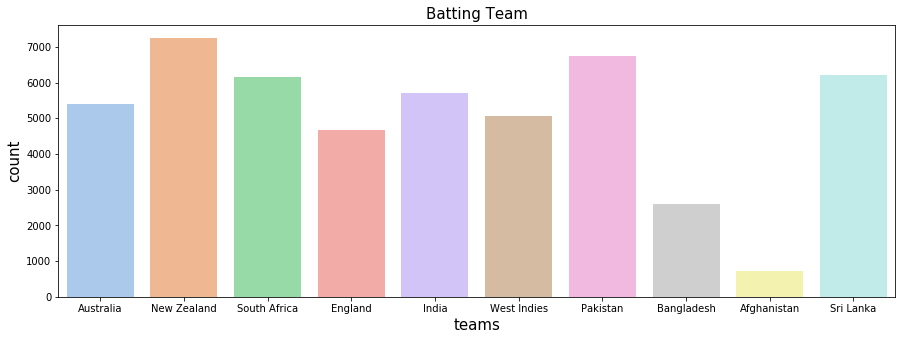

In [42]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(final_df['batting_team'], palette = 'pastel')
plt.title('Batting Team', fontsize = 15)
plt.xlabel('teams', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

c:\Users\HP\miniconda3\envs\.conda_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


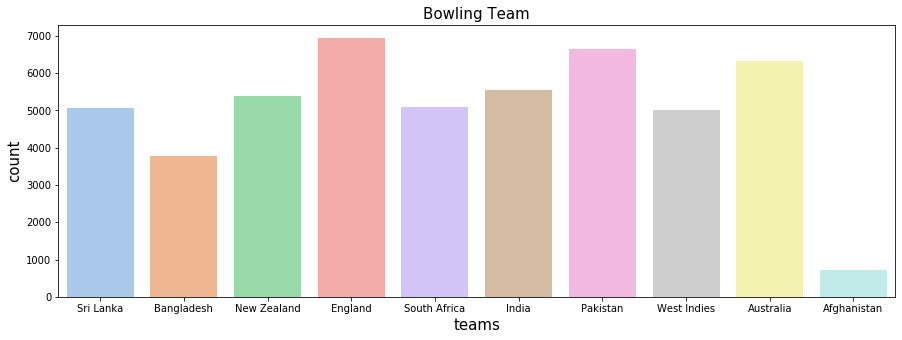

In [43]:
plt.rcParams['figure.figsize'] = (15, 5)
sns.countplot(final_df['bowling_team'], palette = 'pastel')
plt.title('Bowling Team', fontsize = 15)
plt.xlabel('teams', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

c:\Users\HP\miniconda3\envs\.conda_venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


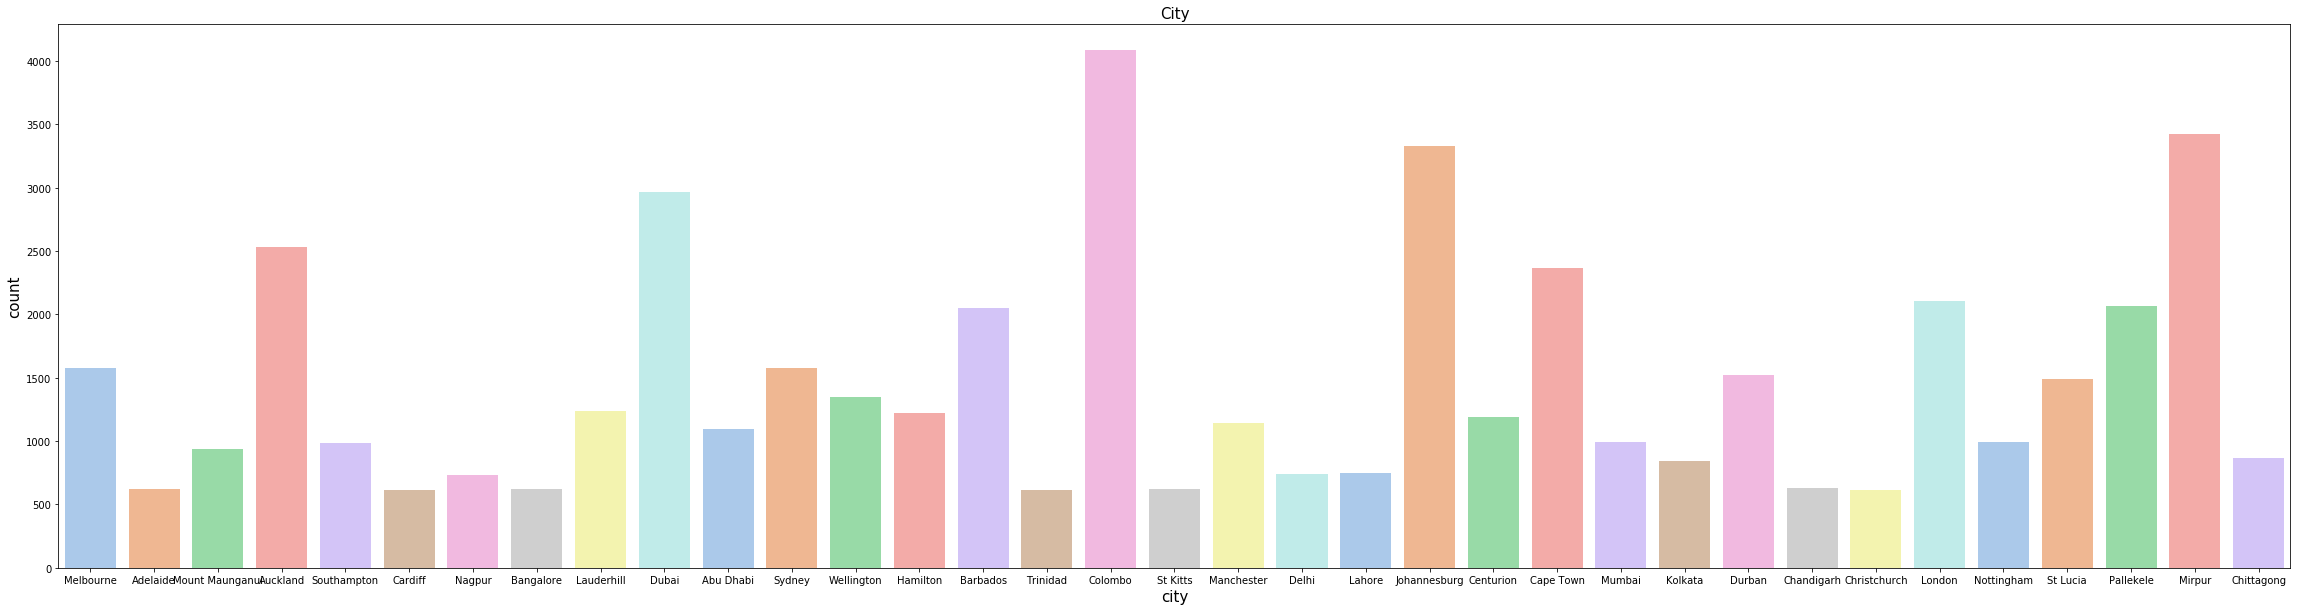

In [44]:
plt.rcParams['figure.figsize'] = (40, 10)
sns.countplot(final_df['city'], palette = 'pastel')
plt.title('City', fontsize = 15)
plt.xlabel('city', fontsize = 15)
plt.ylabel('count', fontsize = 15)
plt.show()

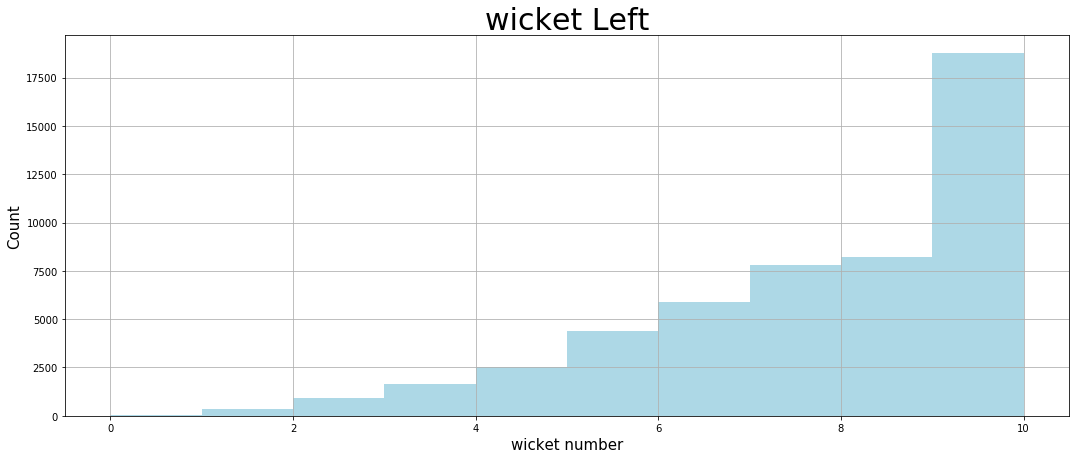

In [45]:
plt.rcParams['figure.figsize'] = (18, 7)

plt.hist(final_df['wicket_left'], color = 'lightblue', bins=10)
plt.title('wicket Left', fontsize = 30)
plt.xlabel('wicket number', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.grid()
plt.show()

In [46]:
# sns.pairplot(final_df)

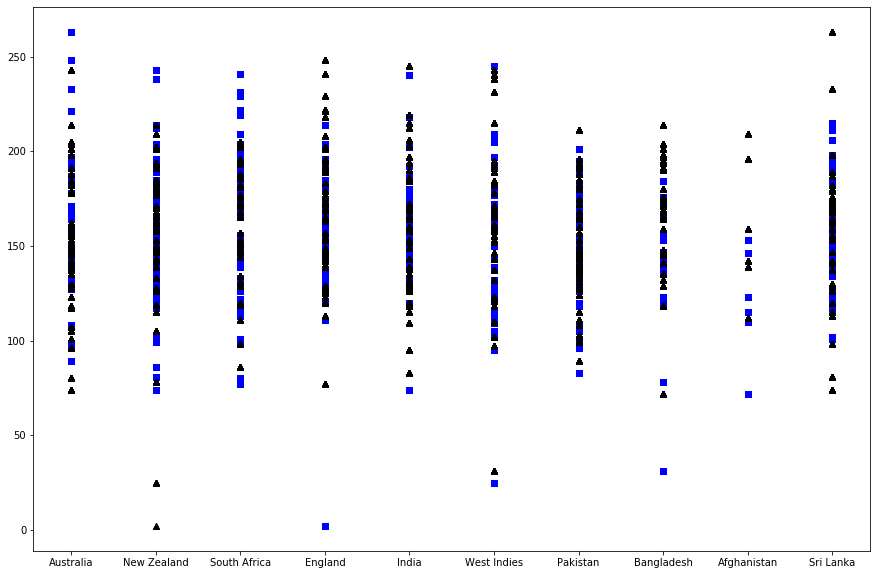

In [47]:
plt.figure(figsize=(15, 10))
plt.plot(final_df['batting_team'], final_df['runs_x'], 'bs')
plt.plot(final_df['bowling_team'], final_df['runs_x'], 'k^')
plt.show()

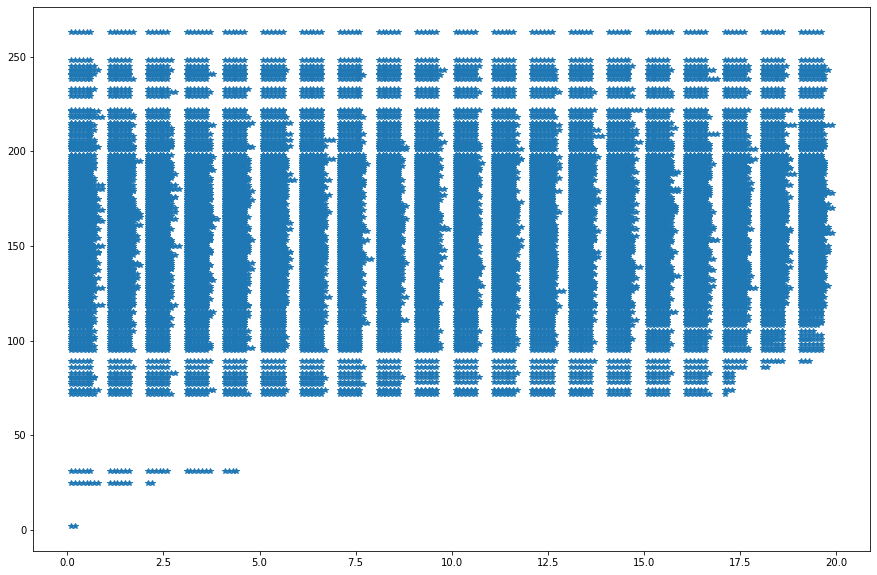

In [48]:
plt.figure(figsize=(15, 10))
plt.plot(final_df['ball'], final_df['runs_x'], '*')
plt.show()

In [49]:
final_df.columns

Index(['match_id', 'runs_x', 'Unnamed: 0', 'batting_team', 'bowling_team',
       'ball', 'runs_y', 'player_dismissed', 'city', 'venue', 'current_score',
       'over', 'ball_no', 'balls_bowled', 'balls_left', 'wicket_left', 'crr',
       'last_five'],
      dtype='object')

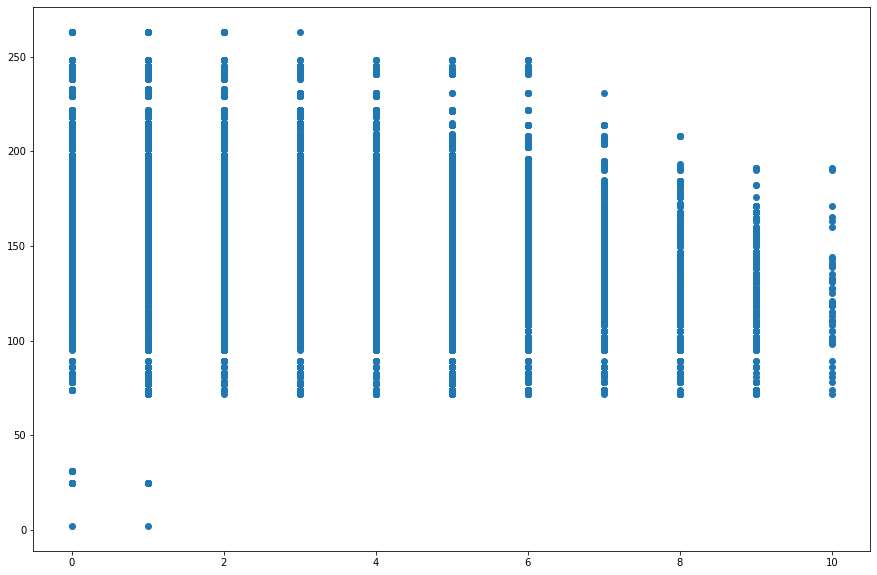

In [50]:
plt.figure(figsize=(15, 10))
plt.scatter(final_df['player_dismissed'], final_df['runs_x'])
plt.show()

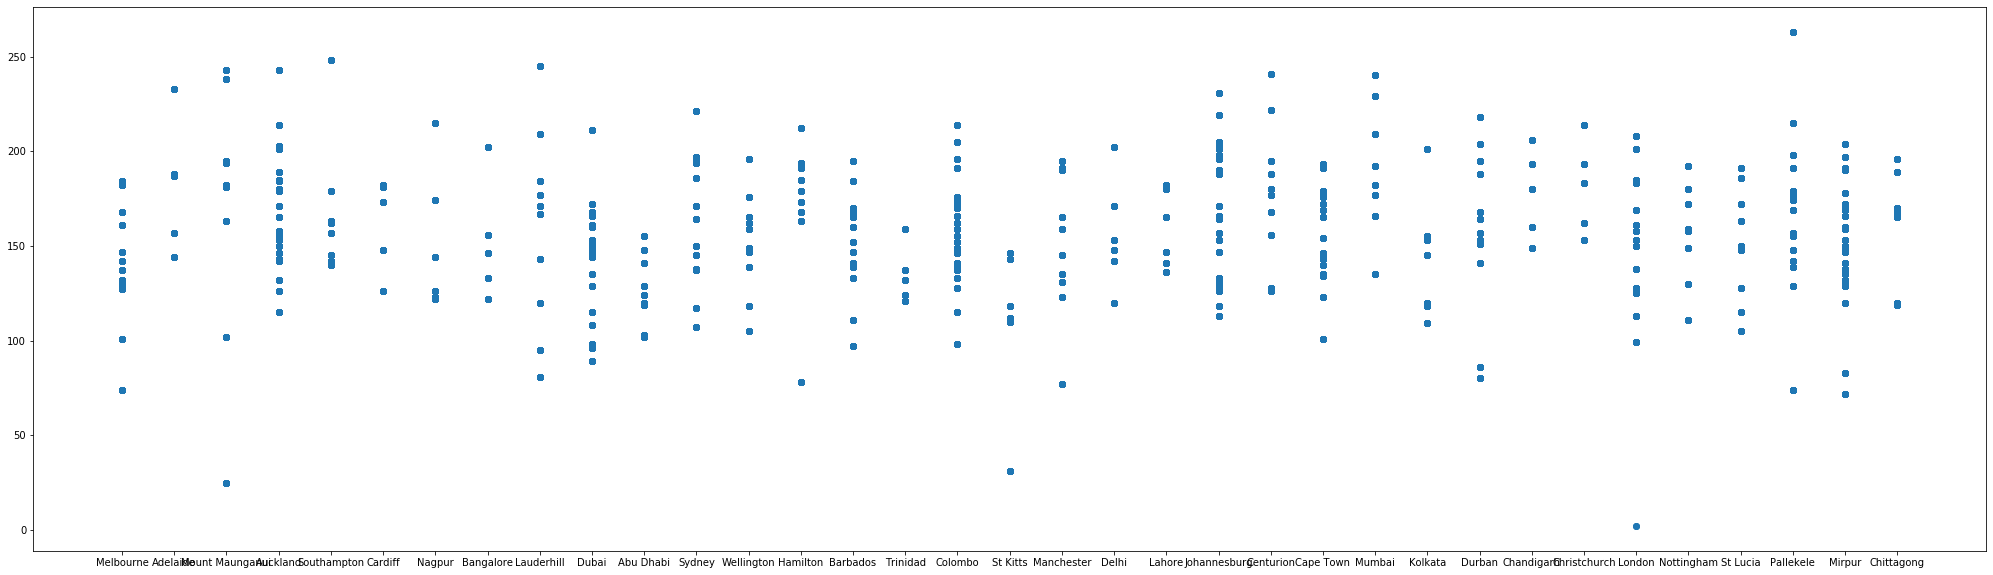

In [51]:
plt.figure(figsize=(35, 10))
plt.scatter(final_df['city'], final_df['runs_x'])
plt.show()

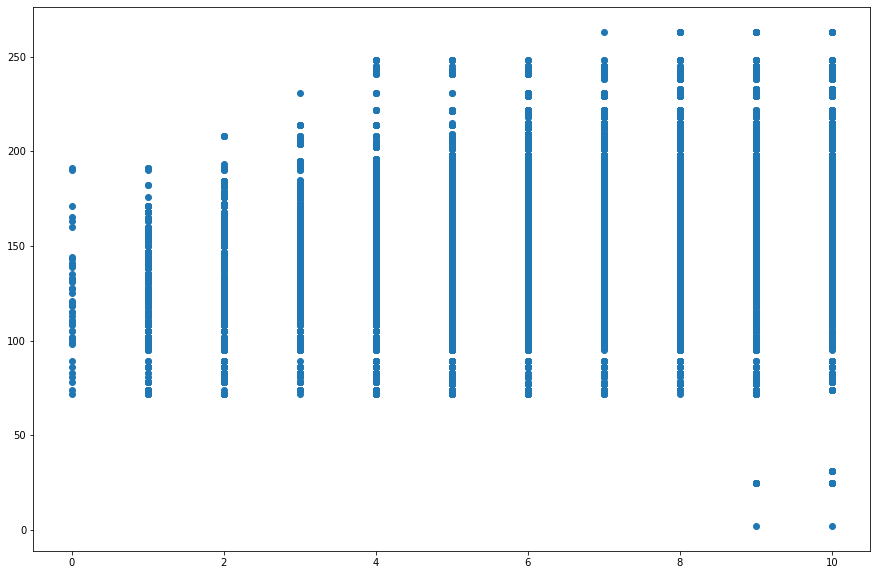

In [52]:
plt.figure(figsize=(15, 10))
plt.scatter(final_df['wicket_left'], final_df['runs_x'])
plt.show()

# Feature selection

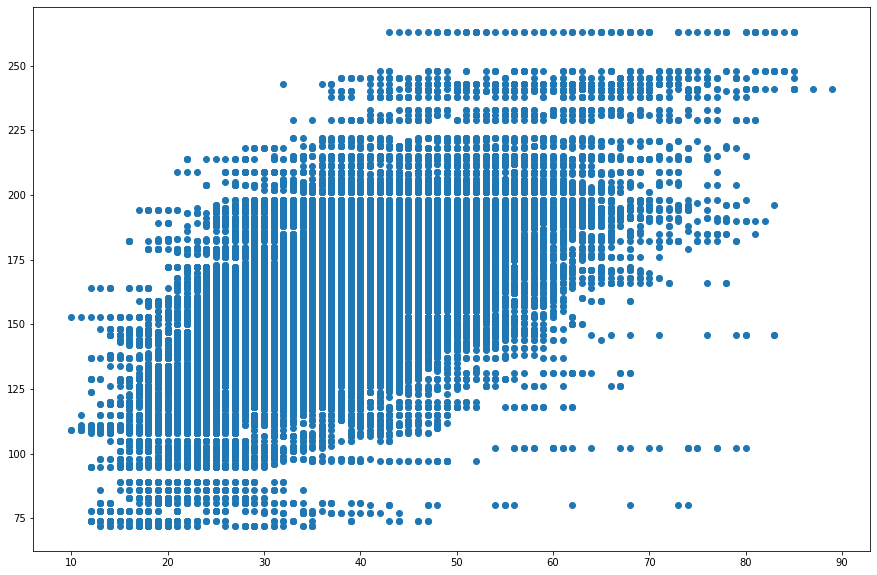

In [53]:
plt.figure(figsize=(15, 10))
plt.scatter(final_df['last_five'], final_df['runs_x'])
plt.show()

In [54]:
final_df = final_df[['batting_team', 'bowling_team', 'city', 'current_score', 'balls_left', 'wicket_left', 'crr','last_five', 'runs_x']]

In [55]:
final_df.dropna(inplace=True)

In [56]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
current_score    0
balls_left       0
wicket_left      0
crr              0
last_five        0
runs_x           0
dtype: int64

In [57]:
final_df.shape

(38477, 9)

In [58]:
final_df = final_df.sample(final_df.shape[0])

In [59]:
final_df

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
3647,Sri Lanka,India,Colombo,104,43,6,8.103896,37.0,170
30419,West Indies,England,London,58,72,9,7.250000,31.0,125
27666,Australia,England,Adelaide,155,0,6,7.750000,40.0,157
47567,South Africa,Afghanistan,Mumbai,160,20,7,9.600000,62.0,209
19316,South Africa,Australia,Centurion,36,83,8,5.837838,27.0,156
...,...,...,...,...,...,...,...,...,...
11387,India,New Zealand,Mount Maunganui,63,71,9,7.714286,36.0,163
1950,England,Australia,Melbourne,85,33,6,5.862069,21.0,137
23773,Afghanistan,India,St Lucia,41,65,7,4.472727,18.0,115
17999,India,Pakistan,Johannesburg,112,26,6,7.148936,36.0,157


In [60]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38477 entries, 3647 to 8785
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   38477 non-null  object 
 1   bowling_team   38477 non-null  object 
 2   city           38477 non-null  object 
 3   current_score  38477 non-null  int64  
 4   balls_left     38477 non-null  int64  
 5   wicket_left    38477 non-null  int32  
 6   crr            38477 non-null  float64
 7   last_five      38477 non-null  float64
 8   runs_x         38477 non-null  int64  
dtypes: float64(2), int32(1), int64(3), object(3)
memory usage: 2.8+ MB


In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()
for cat_var in final_df.columns:
    if np.dtype(final_df[cat_var]) == 'O':
        final_df[cat_var] = le.fit_transform(final_df[cat_var])

In [63]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38477 entries, 3647 to 8785
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   batting_team   38477 non-null  int32  
 1   bowling_team   38477 non-null  int32  
 2   city           38477 non-null  int32  
 3   current_score  38477 non-null  int64  
 4   balls_left     38477 non-null  int64  
 5   wicket_left    38477 non-null  int32  
 6   crr            38477 non-null  float64
 7   last_five      38477 non-null  float64
 8   runs_x         38477 non-null  int64  
dtypes: float64(2), int32(4), int64(3)
memory usage: 2.3 MB


In [64]:
final_df.head()

,batting_team,bowling_team,city,current_score,balls_left,wicket_left,crr,last_five,runs_x
3647,8,4,11,104,43,6,8.103896,37.0,170
30419,9,3,20,58,72,9,7.250000,31.0,125
27666,1,3,1,155,0,6,7.750000,40.0,157
47567,7,0,25,160,20,7,9.600000,62.0,209
19316,7,1,7,36,83,8,5.837838,27.0,156


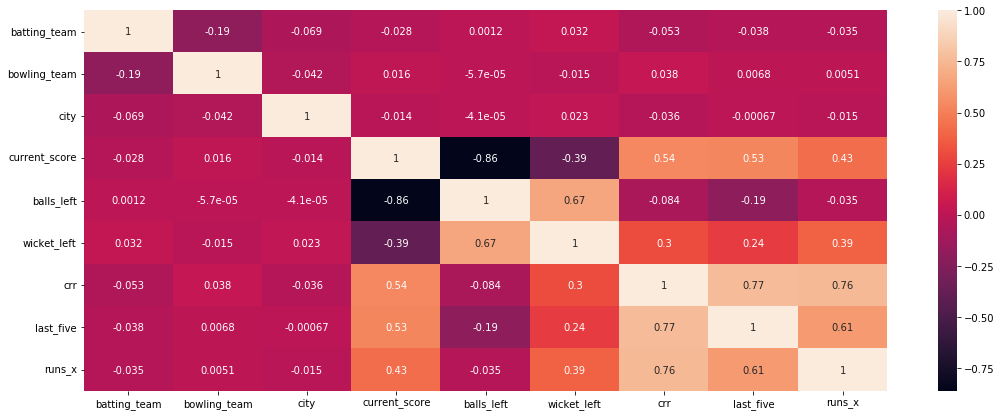

In [65]:
sns.heatmap(final_df.corr(), annot=True)

In [66]:
x = final_df.drop(columns=['runs_x'])
y = final_df['runs_x']

In [67]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_absolute_error

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Modelling
## Regression

## Linear Regression

In [69]:
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
train_score = lin_reg.score(x_train, y_train)
test_score = lin_reg.score(x_test, y_test)
y_pred1 = lin_reg.predict(x_test)
print('train score: ', train_score)
print('test score: ', test_score)
print('r2 score: ',r2_score(y_test, y_pred1))
print('mae : ', mean_absolute_error(y_test, y_pred1))

train score:  0.6533005713538652
test score:  0.6554334088469522
r2 score:  0.6554334088469522
mae :  13.81249628129634


In [70]:
lin_reg.coef_

array([-8.69106470e-02, -1.59611423e-01, -1.92443471e-03,  7.88637295e-01,
        8.24080711e-01,  4.30463222e+00,  3.14156908e+00,  2.87985680e-02])

In [71]:
lin_reg.intercept_

-4.565900979763285

## Lasso Regression and Ridge Regression

In [72]:
alpha_space = np.logspace(-4, 0, 30)   # Checking for alpha from .0001 to 1 and finding the best value for alpha
alpha_space

array([1.00000000e-04, 1.37382380e-04, 1.88739182e-04, 2.59294380e-04,
       3.56224789e-04, 4.89390092e-04, 6.72335754e-04, 9.23670857e-04,
       1.26896100e-03, 1.74332882e-03, 2.39502662e-03, 3.29034456e-03,
       4.52035366e-03, 6.21016942e-03, 8.53167852e-03, 1.17210230e-02,
       1.61026203e-02, 2.21221629e-02, 3.03919538e-02, 4.17531894e-02,
       5.73615251e-02, 7.88046282e-02, 1.08263673e-01, 1.48735211e-01,
       2.04335972e-01, 2.80721620e-01, 3.85662042e-01, 5.29831691e-01,
       7.27895384e-01, 1.00000000e+00])

In [73]:
lasso_scores = []
lasso = Lasso()
for alpha in alpha_space:
    lasso.alpha = alpha
    val = np.mean(cross_val_score(lasso, x_train, y_train, cv=10))
    lasso_scores.append(val)


In [74]:
ridge_scores = []
ridge = Ridge()
for alpha in alpha_space:
    ridge.alpha = alpha
    val = np.mean(cross_val_score(ridge, x_train, y_train, cv=10))
    ridge_scores.append(val)


In [96]:
np.mean(lasso_scores)

0.65271173485246

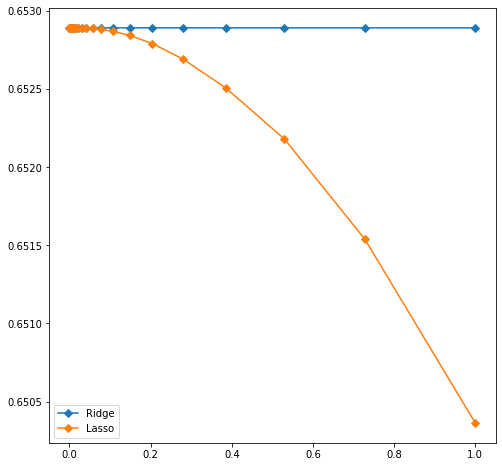

In [75]:
plt.figure(figsize=(8, 8))
plt.plot(alpha_space, ridge_scores, marker = 'D', label = "Ridge")
plt.plot(alpha_space, lasso_scores, marker = 'D', label = "Lasso")
plt.legend()
plt.show()

Through above graph, we can see that accuracy reduces as value for alpha increases. But best value of alpha can be occupied using GridSearchCV with Cross Validation technique. As, in above chart, CV was not performed, hence we can't have confidence in what we are seeing.

In [76]:
# Performing GridSearchCV with Cross Validation technique and finding the optimum value of alpha
params = {'alpha': (np.logspace(-8, 8, 100))} # it will check from 1e-08 to 1e+08
lasso = Lasso()
lasso_model = GridSearchCV(lasso, params, cv=10)
lasso_model.fit(x_train, y_train)
print(lasso_model.best_params_)
best_alpha = lasso_model.best_params_['alpha']

{'alpha': 0.0200923300256505}


In [77]:
# Using value of alpha as 0.000705 to get best accuracy for Lasso Regression
lasso = Lasso(alpha = best_alpha)
lasso.fit(x_train, y_train)

train_score = lasso.score(x_train, y_train)
print(train_score)
test_score = lasso.score(x_test, y_test)
print(test_score)


0.653299396353648
0.655400291307745


In [98]:
print('r2 score: ',r2_score(y_test, lasso.predict(x_test)))
print('mae : ', mean_absolute_error(y_test, lasso.predict(x_test)))

r2 score:  0.655400291307745
mae :  13.814114222261704


In [78]:
# Performing GridSearchCV with Cross Validation technique on Ridge Regression and finding the optimum value of alpha

params = {'alpha': (np.logspace(-8, 8, 100))} # It will check from 1e-08 to 1e+08
ridge = Ridge()
ridge_model = GridSearchCV(ridge, params, cv = 10)
ridge_model.fit(x_train, y_train)
print(ridge_model.best_params_)
best_alpha = ridge_model.best_params_['alpha']

{'alpha': 72.20809018385486}


In [79]:
# Using value of alpha as 0.020092 to get best accuracy for Ridge Regression
ridge = Ridge(alpha = best_alpha)
ridge.fit(x_train, y_train)

train_score = ridge.score(x_train, y_train)
print(train_score)
test_score = ridge.score(x_test, y_test)
print(test_score)


0.6533003629612173
0.6554266747608971


In [99]:
print('r2 score: ',r2_score(y_test, ridge.predict(x_test)))
print('mae : ', mean_absolute_error(y_test, ridge.predict(x_test)))

r2 score:  0.6554266747608971
mae :  13.81278981252689


## Modeling (Decisition tree)

In [80]:
from sklearn.tree import DecisionTreeRegressor
reg_decision_model = DecisionTreeRegressor()

In [81]:
reg_decision_model.fit(x_train, y_train)
train_score = reg_decision_model.score(x_train, y_train)
test_score = reg_decision_model.score(x_test, y_test)
print(f'train score: {train_score} \ntest score: {test_score}')

train score: 0.9999657311632947 
test score: 0.9420996432425974


In [82]:
# Hyper parameters range intialization for tuning 

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }

In [83]:
reg_decision_model_tuning = GridSearchCV(reg_decision_model,param_grid=parameters,scoring='neg_mean_squared_error',cv=3)


In [84]:
%%time
reg_decision_model_tuning.fit(x_train, y_train)

Wall time: 18min 57s


GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=None,
                                             splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                   

In [85]:
# best hyperparameters 
reg_decision_model_tuning.best_params_

{'max_depth': 5,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [86]:
# best model score
reg_decision_model_tuning.best_score_

-466.56038426116294

In [87]:
dt_tuned_model = DecisionTreeRegressor(max_depth=5, max_features='auto', max_leaf_nodes=None, min_samples_leaf=1, min_weight_fraction_leaf=0.1, splitter='best')
dt_tuned_model.fit(x_train, y_train)
train_score = dt_tuned_model.score(x_train, y_train)
test_score = dt_tuned_model.score(x_test, y_test)

In [88]:
print(f"train score = {train_score} \ntest score = {test_score}")

train score = 0.5423634297570337 
test score = 0.5500332986877305


In [100]:
print('r2 score: ',r2_score(y_test, dt_tuned_model.predict(x_test)))
print('mae : ', mean_absolute_error(y_test, dt_tuned_model.predict(x_test)))

r2 score:  0.5500332986877305
mae :  16.061006121265937


## Modeling : Ensemble 
#### Random Forest Regressor

In [89]:
from sklearn.ensemble import RandomForestRegressor

In [90]:
rfg = RandomForestRegressor()
rfg.fit(x_train, y_train)
train_score = rfg.score(x_train, y_train)
test_score = rfg.score(x_test, y_test)
print(f"train score = {train_score} \ntest score = {test_score}")

train score = 0.9963465289125859 
test score = 0.9764242495945699


### Hyperparameter tuning using RandomizedSearch CV


In [92]:
n_estimators = [5,20,50,100] # number of trees in the random forest
max_features = ['auto', 'sqrt'] # number of features in consideration at every split
max_depth = [int(x) for x in np.linspace(10, 120, num = 12)] # maximum number of levels allowed in each decision tree
min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

'min_samples_split': min_samples_split,

'min_samples_leaf': min_samples_leaf,

'bootstrap': bootstrap}

In [93]:
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf,param_distributions = random_grid,
               n_iter = 100, cv = 5, verbose=2, random_state=35, n_jobs = -1)
rf_random.fit(x_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   24.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  8.5min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 10.6min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [94]:
train_score = rf_random.score(x_train, y_train)
test_score = rf_random.score(x_test, y_test)
print(f"train score = {train_score} \ntest score = {test_score}")

train score = 0.9963236249531285 
test score = 0.9750689295512421


In [101]:
print('r2 score: ',r2_score(y_test, rf_random.predict(x_test)))
print('mae : ', mean_absolute_error(y_test, rf_random.predict(x_test)))

r2 score:  0.9750689295512421
mae :  2.3015185377685383
